In [ ]:
# Notebook for debugging the pipline

In [1]:
from dataset_processing import DatasetPreProcessor
from pipeline import Pipeline
import pandas as pd

2026-02-08 12:56:38,463 - root - INFO - Logging initialized. Log file: /Users/chris/logs/cognitive_language_model_logs/run_20260208_125638.log


In [5]:

base_path_linux = "/home/chris/gdrive"
base_path_mac = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD"
#json_path = base_path_linux + "/work/annabell/experiments/31/data_sets/nyc_squad_with_pretraining_commands.jsonl"
json_path = base_path_mac + "/work/annabell/experiments/31/data_sets/nyc_squad_with_pretraining_commands.jsonl"

pipeline = Pipeline(prepared_dataset_filepath=json_path)
pipeline.load_prepared_dataset()
#pipeline.run_pre_training_evaluation_testing()
#pipeline.run_evaluate_pre_training_results()
#pipeline.generate_pre_training_data()


2026-02-08 13:21:08,431 - pipeline - INFO - Loading prepared dataset from /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/31/data_sets/nyc_squad_with_pretraining_commands.jsonl...
2026-02-08 13:21:09,313 - pipeline - INFO - Prepared dataset loaded successfully.


In [ ]:
#sum the number of distinct words in all of the pre-training commands in the dataset
def count_distinct_words_in_pre_training_commands(dataset):
    distinct_words = set()
    for index, row in dataset.iterrows():
        pre_training_command = row['pre_training_command']
        if isinstance(pre_training_command, str):
            words = pre_training_command.split()
            distinct_words.update(words)
    return len(distinct_words)


dataset = pipeline.datasetPreProcessor.dataset
num_distinct_words = count_distinct_words_in_pre_training_commands(dataset)
print(f"Number of distinct words in pre-training commands: {num_distinct_words}")

In [8]:
dataset

,id,title,context,question,declarative_statement,answer,declarative_statement_formatted,question_formatted,answer_formatted,question_category,statement_category
0,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,In front of the Notre Dame Main Building stand...,a copper statue of Christ,in front of the Notre_Dame_Main_Building stand...,? what be in front of the Notre_Dame_Main_Buil...,a copper statue of Christ,Subject-Verb-Object-Adverbial,Subject-Verb-Adverbial
1,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,The Basilica of the Sacred Heart at **Notre Da...,the Main Building,the Basilica of the Sacred Heart at Notre_Dame...,? the Basilica of the sacred heart at Notre_Da...,the Main_Building,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object
2,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,The Grotto at Notre Dame is a Marian place of ...,a Marian place of prayer and reflection,the Grotto at Notre_Dame be a marian place of ...,? what be the Grotto at Notre_Dame,a marian place of prayer and reflection,Subject-Verb-Object-Complement,Subject-Verb-Complement
3,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,"Atop the Main Building of **Notre-Dame**, a go...",a golden statue of the Virgin Mary,atop the Main_Building of Notre - Dame a golde...,? what sit on top of the Main_Building at Notr...,a golden statue of the Virgin_Mary,Subject-Verb-Object-Adverbial,Subject-Verb-Complement
4,5733bf84d058e614000b61be,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",When did the Scholastic Magazine of Notre dame...,The *Scholastic Magazine of Notre Dame* began ...,September 1876,the Scholastic_Magazine of Notre_Dame begin pu...,? when do the Scholastic_Magazine of Notre dam...,September_1876,Subject-Verb-Adverbial,Subject-Verb-Adverbial
...,...,...,...,...,...,...,...,...,...,...,...
877,56d4f71e2ccc5a1400d833a8,Beyoncé,"In October 2014, Beyoncé signed a deal to laun...",What company did Beyoncé contract with to sell...,Beyoncé contracted with Topshop to sell her cl...,Topshop,Beyonce contract with Topshop to sell her clot...,? what company do Beyonce contract with to sel...,Topshop,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object-Complement
878,56d4f71e2ccc5a1400d833aa,Beyoncé,"In October 2014, Beyoncé signed a deal to laun...",What type of clothing does the British partner...,The British partnership with Beyoncé sells act...,activewear,the british partnership with Beyonce sell acti...,? what type of clothing do the british partner...,activewear,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object-Complement
879,56bed4553aeaaa14008c94e5,Beyoncé,"After Hurricane Katrina in 2005, Beyoncé and R...",What national disaster caused Beyonce to creat...,Beyoncé established the Survivor Foundation in...,Hurricane Katrina,Beyonce establish the Survivor_Foundation in r...,? what national disaster cause Beyonce to crea...,Hurricane_Katrina,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object-Complement
880,56bed4553aeaaa14008c94e8,Beyoncé,"After Hurricane Katrina in 2005, Beyoncé and R...",What hurricane years later after Katrina did t...,The organization provided support following Hu...,Ike,the organization provide support follow Hurric...,? what hurricane year_later after Katrina do t...,Ike,Subject-Verb-Indirect Object-Adverbial,Subject-Verb-Object-Adverbial


In [ ]:
pipeline.run_pre_training()
pipeline.run_pre_training_evaluation_testing()
pipeline.run_evaluate_pre_training_results()
pipeline.run_training()
pipeline.run_testing()
pipeline.run_evaluate_training_results()

In [ ]:
fp = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/sandbox_v2/data_sets/nyc_squad_with_pretraining_commands.jsonl"

df = pd.read_json(fp, lines=True)
DatasetPreProcessor.count_created_commands_errors_in_df(df)
df


In [ ]:
#find the row with id = "56d4eb762ccc5a1400d8334f"
dataframe = pipeline.datasetPreProcessor.dataset
dataframe[dataframe[
              'question'] == "After what movie portraying Etta James, did Beyonce create Sasha Fierce?"]

In [ ]:
df[df['id'] == "5733a6424776f41900660f50"]

In [2]:
import os
from annabell_utilities import AnnabellLogfileInterpreter

log_dir = "/home/chris/gdrive/work/annabell/experiments/sandbox/logs"
log_filename = "annabell_pre_training_log.txt"
log_filepath = os.path.join(log_dir, log_filename)
log_filepath = '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/31/logs/annabell_pre_training_log.txt'
interpreter = AnnabellLogfileInterpreter(log_filepath)
interpreter.parse_entries()

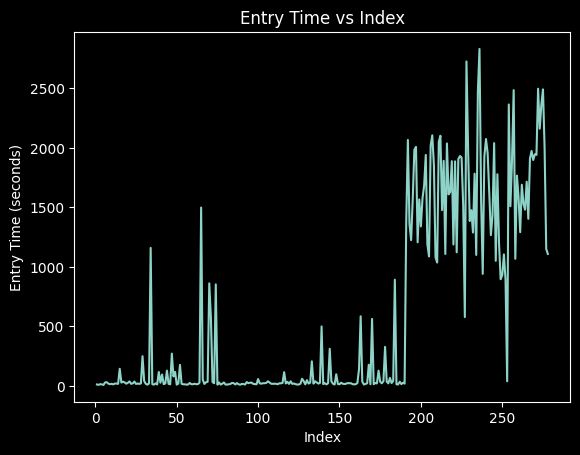

In [3]:
#create a graph of entry time vs index
import matplotlib.pyplot as plt

plt = interpreter.plot_entry_time_vs_sample_number()
plt.show()

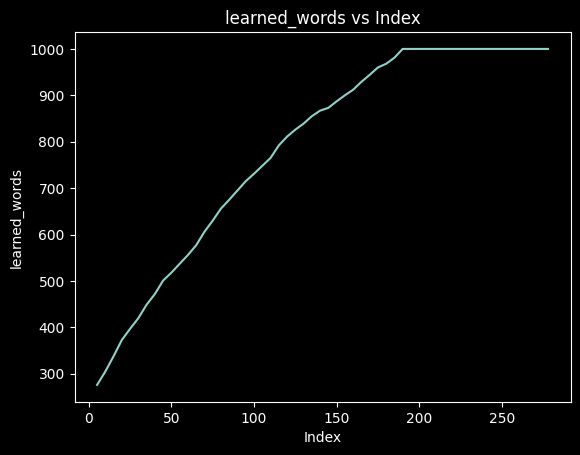

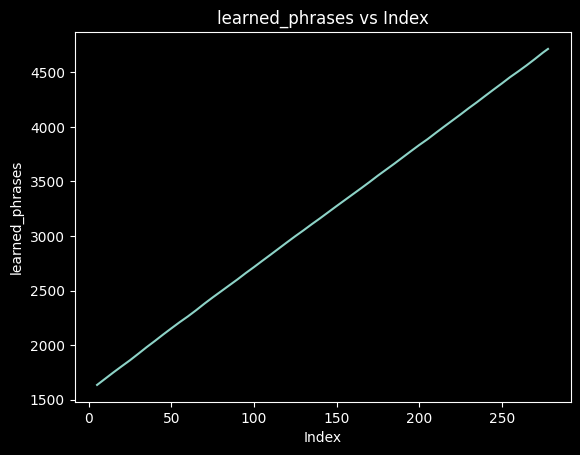

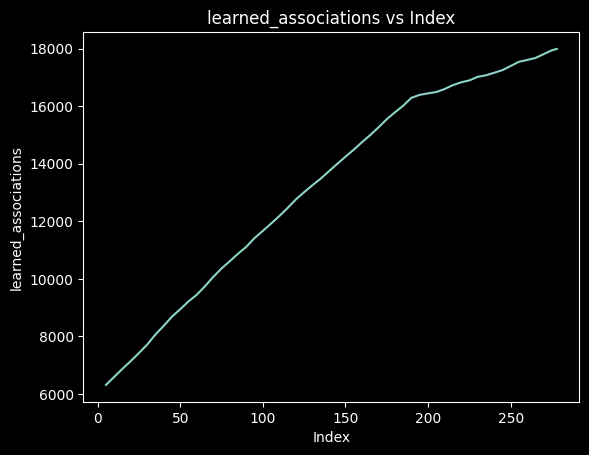

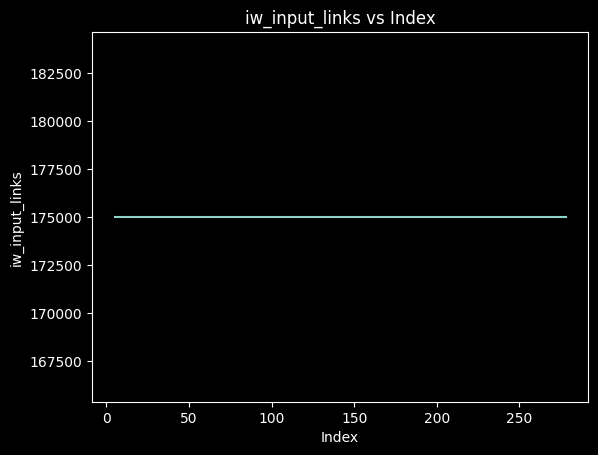

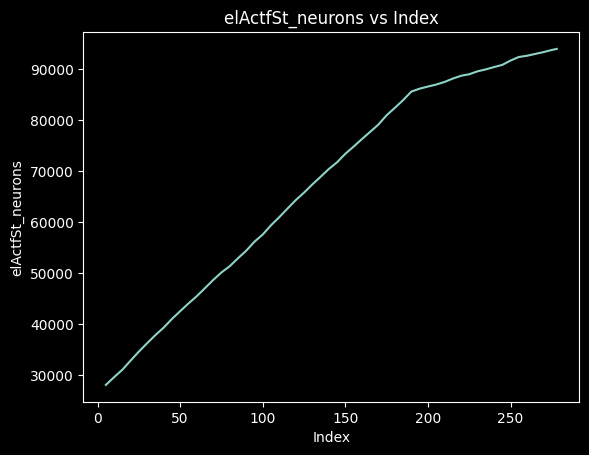

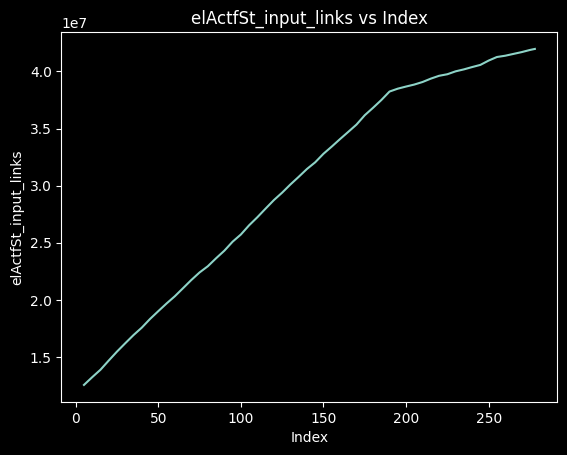

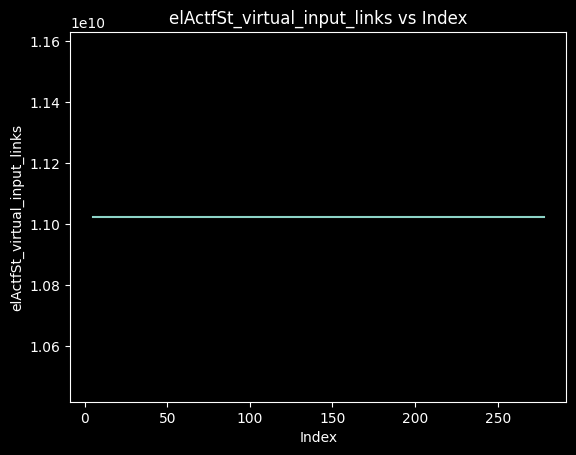

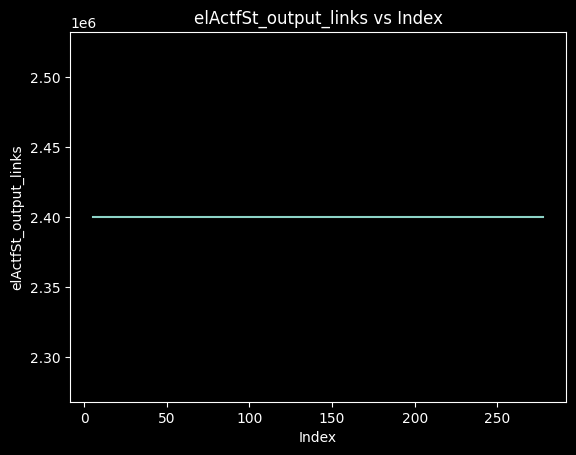

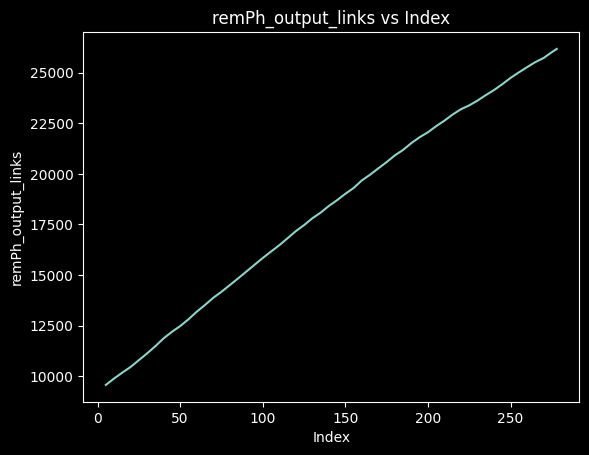

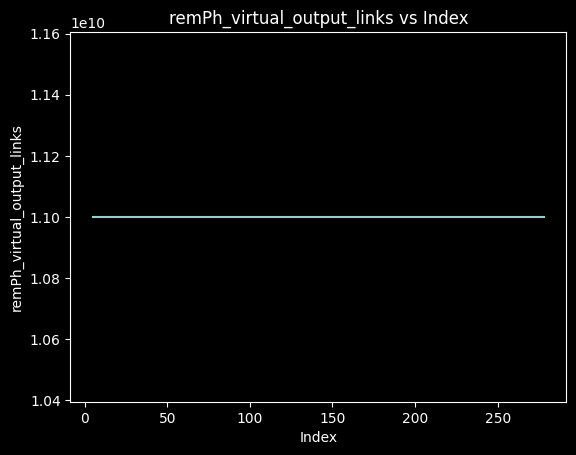

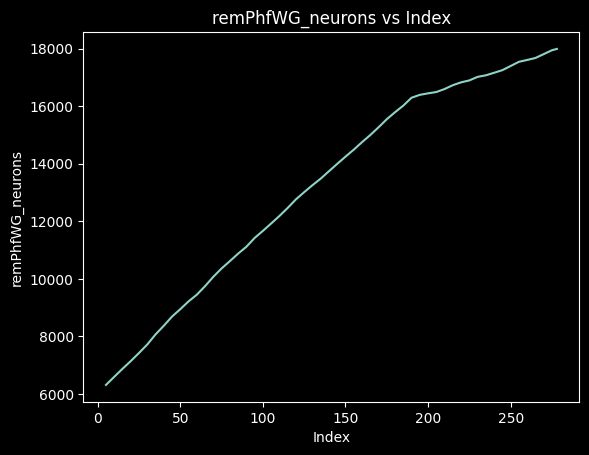

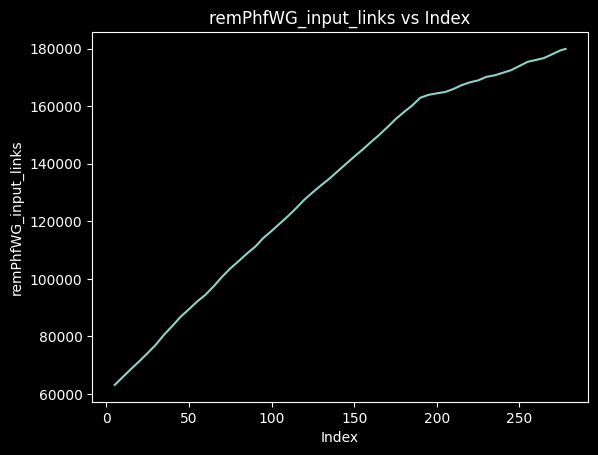

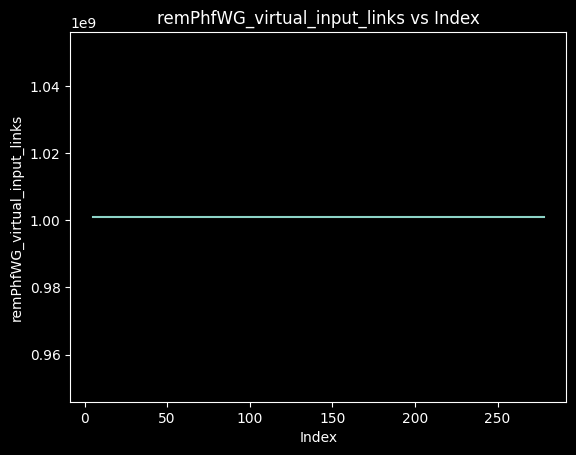

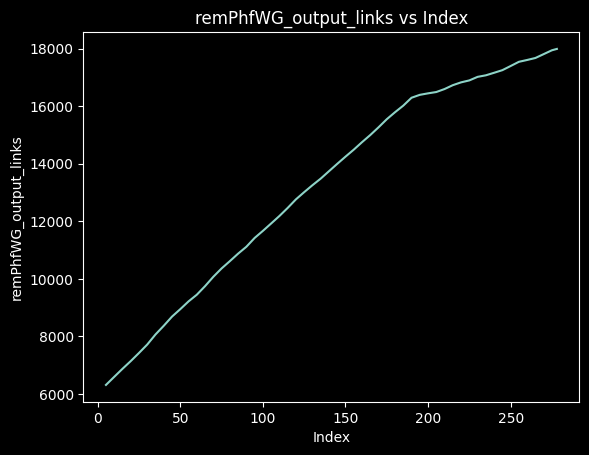

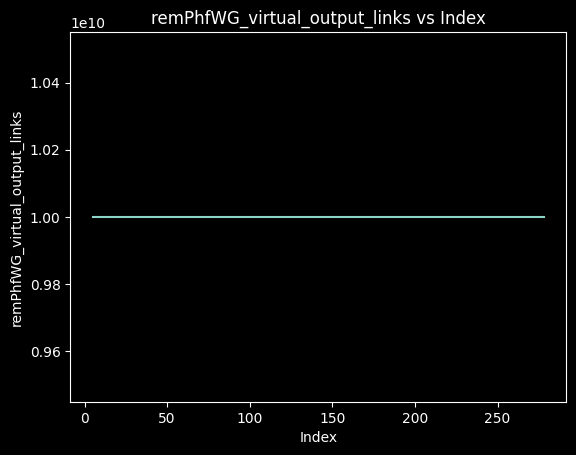

In [4]:
#plot a graph showing each stat measure vs index
for plt in interpreter.plot_stat_measures_vs_index():
    plt.show()

In [ ]:
#plot a graph showing "test_answer_correct" vs index
import matplotlib.pyplot as plt
import pandas as pd


def plot_test_answer_correct(the_df):
    plt.plot(the_df.index, the_df["test_answer_correct"])
    plt.xlabel("Index")
    plt.ylabel("Answer Correct")
    plt.title("Test Answer Correct vs Index")
    plt.show()


df_25 = pd.read_csv(
    '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/31/pre_training/results/test_detailed_results_tsv',
    sep='\t')
plot_test_answer_correct(df_25)

In [9]:
df_31 = pd.read_csv(
    '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/31/pre_training/results/test_detailed_results_tsv',
    sep='\t')

In [10]:
df_31

,id,title,context,question,declarative_statement,answer,declarative_statement_formatted,question_formatted,answer_formatted,question_category,statement_category,is_pretraining,created_commands,created_commands_error,test_answer,test_answer_embedding,answer_formatted_embedding,test_answer_cosine_distance,test_answer_correct,test_answer_any_matching_word
0,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,The Basilica of the Sacred Heart at **Notre Da...,the Main Building,the Basilica of the Sacred Heart at Notre_Dame...,? the Basilica of the sacred heart at Notre_Da...,the Main_Building,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object,True,"['#id: 5733be284776f41900661180', 'the Basilic...",False,the Main_Building,"[-0.14445384, 0.037962675, 0.03795497, 0.00615...","[-0.14445384, 0.037962675, 0.03795497, 0.00615...",0.000000,True,True
1,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,The Grotto at Notre Dame is a Marian place of ...,a Marian place of prayer and reflection,the Grotto at Notre_Dame be a marian place of ...,? what be the Grotto at Notre_Dame,a marian place of prayer and reflection,Subject-Verb-Object-Complement,Subject-Verb-Complement,True,"['#id: 5733be284776f41900661181', 'the Grotto ...",False,a marian place of prayer and reflection,"[-0.1333763, 0.012673856, -0.055095192, 0.0023...","[-0.1333763, 0.012673856, -0.055095192, 0.0023...",0.000000,True,True
2,5733bf84d058e614000b61be,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",When did the Scholastic Magazine of Notre dame...,The *Scholastic Magazine of Notre Dame* began ...,September 1876,the Scholastic_Magazine of Notre_Dame begin pu...,? when do the Scholastic_Magazine of Notre dam...,September_1876,Subject-Verb-Adverbial,Subject-Verb-Adverbial,True,"['#id: 5733bf84d058e614000b61be', 'the Scholas...",False,September_1876,"[-0.16023444, 0.027363136, 0.01109625, 0.02618...","[-0.16023444, 0.027363136, 0.01109625, 0.02618...",0.000000,True,True
3,5733bf84d058e614000b61bd,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How many student news papers are found at Notr...,Notre Dame hosts three student newspapers.,three,Notre_Dame host three student newspaper,? how many student news paper be find at Notre...,three,Subject-Verb-Indirect Object,Subject-Verb-Object-Complement,True,"['#id: 5733bf84d058e614000b61bd', 'Notre_Dame ...",False,three,"[-0.18832567, 0.041536253, 0.027108936, 0.0039...","[-0.18832567, 0.041536253, 0.027108936, 0.0039...",0.000000,True,True
4,5733bf84d058e614000b61c1,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",In what year did the student paper Common Sens...,The student paper *Common Sense* began publica...,1987,the student paper Common Sense begin publicati...,? in what_year do the student paper Common Sen...,1987,Subject-Verb-Indirect Object,Subject-Verb-Adverbial,True,"['#id: 5733bf84d058e614000b61c1', 'the student...",False,1987,"[-0.14837766, -0.011699587, -0.016173374, 0.02...","[-0.14837766, -0.011699587, -0.016173374, 0.02...",0.000000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,56d4f6e02ccc5a1400d833a0,Beyoncé,"In 2005, Beyoncé teamed up with House of Brand...",What was the name of the junior fashions launc...,The junior fashion line launched in 2009 by Be...,Sasha Fierce for Deréon,the junior fashion line launch in 2009 by Beyo...,? what be the name of the junior fashion launc...,Sasha_Fierce for Dereon,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Indirect Object-Direct Object-Com...,True,"['#id: 56d4f6e02ccc5a1400d833a0', 'the junior ...",False,Beyonce,"[-0.21084978, -0.010943605, 0.020436177, 0.017...","[-0.13048643, -0.013559667, 0.010799174, -0.00...",0.624943,False,False
274,5

In [18]:
#sum the number of distinct words in all of the pre-training commands in the dataset
def count_distinct_words_in_pre_training_commands(the_dataset, up_to_index):
    distinct_words = set()
    for index, row in the_dataset.iterrows():
        if index > up_to_index:
            break
        dec_statement = row["declarative_statement_formatted"]
        question = row["question_formatted"]
        d_words = dec_statement.split()
        q_words = question.split()
        words = d_words + q_words
        distinct_words.update(words)
    return len(distinct_words)


num_distinct_words = count_distinct_words_in_pre_training_commands(df_31, up_to_index=189)
print(f"Number of distinct words in pre-training commands: {num_distinct_words}")

Number of distinct words in pre-training commands: 825


In [16]:
pre_1000_entry = interpreter.entries[184]
print(
    f"Sample number: {pre_1000_entry.sample_number()}, Learned Words: {pre_1000_entry.learned_words()}, Time: {pre_1000_entry.time()} seconds")
post_1000_entry = interpreter.entries[189]
print(
    f"Sample number: {post_1000_entry.sample_number()}, Learned Words: {post_1000_entry.learned_words()}, Time: {post_1000_entry.time()} seconds")

Sample number: 185, Learned Words: 981, Time: 13.25336199999947 seconds
Sample number: 190, Learned Words: 1000, Time: 18.794857000000775 seconds


In [ ]:
['#id: 5733be284776f41900661180', 'the Basilica of the Sacred Heart at Notre_Dame be', 'adjacent to the Main_Building',
 '#END OF DECLARATION', '\n', '? the Basilica of the sacred heart at Notre_Dame', 'be beside to which structure',
 '#END OF QUESTION', '.sctx ? the Basilica of the sacred heart at Notre_Dame', '.pg Basilica', '.wg Notre_Dame', '.ggp',
 '.ph the Basilica of the Sacred Heart at Notre_Dame be', '.drop_goal', '.sctx adjacent to the Main_Building',
 '.wg the Main_Building', '.rw', '\n', '#END OF COMMANDS', '.time', '#END OF TIME']

In [ ]:
#plot a graph showing sum of "test_answer_correct" == flase vs index
import matplotlib.pyplot as plt
import pandas as pd


def plot_test_answer_correct(the_df):
    plt.plot(the_df.index, the_df["test_answer_correct"].apply(lambda x: 0 if x else 1).cumsum())
    plt.xlabel("Index")
    plt.ylabel("Answer Not Correct")
    plt.title("Test Answer Not Correct vs Index")
    plt.show()


df_25 = pd.read_csv(
    '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/30/pre_training/results/test_detailed_results_tsv',
    sep='\t')
plot_test_answer_correct(df_25)

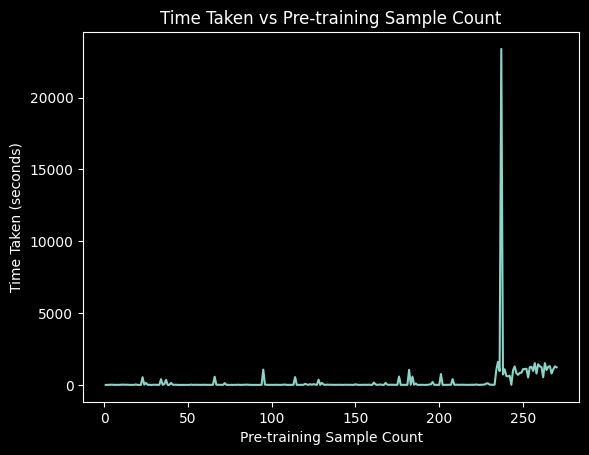

In [9]:
#using the logfile intepreter, plot a graph of the time taken for each pre-training sample vs the count of the sample
import matplotlib.pyplot as plt


def plot_time_taken_vs_sample_count(the_interpreter):
    sample_counts = []
    time_taken = []
    for entry in the_interpreter.entries:
        sample_counts.append(entry.sample_number())
        time_taken.append(entry.time())
    plt.plot(sample_counts, time_taken)
    plt.xlabel("Pre-training Sample Count")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Time Taken vs Pre-training Sample Count")
    plt.show()


plot_time_taken_vs_sample_count(interpreter)
